### Introduction
In this notebook, I use **python programming language** for **munging and visualization of the data**.

Thank **python community** for making open source.

And also, thank data provider **EDGAR(Emissions Database for Global Atmospheric Research)**. You can download the file from the link [EDGAR](https://edgar.jrc.ec.europa.eu/booklet2018/EDGARv5.0_FT2017_fossil_CO2_booklet2018.xls).

Finally, I want to say thanks to **IBM(The International Business Machines)** as I can share my notebook on my **LinkedIn** account. I provide the **IBM Watson-studio** link [IBM](https://www.ibm.com/cloud/watson-studio), please check out you will find some interesting things.

### Importing library

In [1]:
%store -r __importing_Lib

In [2]:
__importing_Lib

matplotlib inline backend and ggplot style are used.
Mplotlib version : 3.1.1
Numpy version	 : 1.16.5
Pandas version	 : 0.25.1
Seaborn version	 : 0.9.0
Folium version	 : 0.10.0
Other imported is: Waffle      
		 : datetime      
		 : base64      
		 : Json


In [3]:
def fifth_grouping(x):
    if x<1976:
        return '[1970, 1975]'
    if x<1981:
        return '[1976, 1980]'
    if x<1986:
        return '[1981, 1985]'
    if x<1991:
        return '[1986, 1990]'
    if x<1996:
        return '[1991, 1995]'
    if x<2001:
        return '[1996, 2000]'
    if x<2006:
        return '[2001, 2005]'
    if x<2011:
        return '[2006, 2010]'
    if x<2016:
        return '[2011, 2015]'
    if x<2021:
        return '[2016, 2018]'
years = list(range(1970, 2019))

### Analysis on $CO_2$ emissions of countries

In [4]:
pd.set_option('display.max_columns', 70) 
carbon_df = pd.read_excel('../EDGARv5.0_FT2018_fossil_CO2_GHG_booklet2019.xls', 
                          sheet_name='fossil_CO2_totals_by_country',
                          skipfooter=3, 
                          index_col=0)
carbon_df.index.name = None
carbon_df.index = (carbon_df.index.str.replace('Italy, San Marino and the Holy See', 'Italy')
                                  .str.replace('France and Monaco', 'France'))
carbon_df['total'] = carbon_df.sum(axis=1)
carbon_df.sort_values('total', ascending=False, inplace=True)
carbon_df.head(6)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
United States,4688.522395,4559.408967,4807.030715,4994.593321,4827.419694,4612.546577,4907.271162,5071.365566,5066.244675,5105.068431,4877.371629,4807.962053,4562.165908,4541.549765,4751.807295,4777.184181,4736.598397,4893.132185,5114.119641,5171.361449,5063.855434,5022.250719,5103.479790,5222.514881,5305.730607,5357.610765,5505.137689,5678.971047,5692.989293,5712.255627,5915.630723,5858.215600,5778.721634,5854.523205,5937.553609,5946.607167,5841.168072,5919.491714,5730.576010,5314.842145,5555.444090,5425.111739,5244.133269,5316.463259,5389.262507,5225.394249,5161.072868,5128.440907,5275.477845,256355.650474
China,905.871699,909.657767,970.674022,1011.185712,1029.343699,1179.733887,1227.090726,1379.490057,1555.775630,1593.621377,1559.623166,1546.147032,1616.606445,1701.814645,1855.956639,1871.328784,1977.304882,2115.850982,2276.338804,2355.367967,2397.508254,2532.739115,2665.268087,2890.342749,3070.996736,3382.890510,3366.770364,3426.052311,3504.389228,3435.832236,3672.115994,3845.809492,4148.318534,4814.415717,5557.300851,6264.757325,6966.022472,7639.914017,7807.277725,8366.143973,9126.942721,10026.720144,10259.090913,10718.579739,10836.458234,10820.801089,10966.733668,11087.005161,11255.878289,215491.859571
Russia,1314.168301,1315.623251,1379.089133,1457.188042,1529.017739,1635.475873,1690.020667,1727.377704,1833.384816,1855.228230,1907.136770,1902.319500,1936.974731,1958.102496,1977.151305,2003.871539,2061.403099,2110.351586,2158.362082,2163.772640,2355.385056,2318.774530,2137.259189,1944.127578,1715.839882,1674.615087,1634.757465,1525.841624,1521.100395,1567.902742,1599.771335,1604.552223,1587.706147,1634.098816,1639.771846,1622.998391,1675.571617,1673.164960,1677.680860,1564.976584,1664.667861,1748.016660,1758.256632,1708.422047,1693.057387,1694.498309,1687.271299,1688.414681,1748.349771,85982.870481
Japan,857.795324,855.642957,901.457823,1015.392413,1013.882856,958.157571,988.552208,1013.479852,1013.490477,1039.200847,1013.138386,990.729570,948.058098,950.011700,1017.971265,991.578783,987.986157,994.339481,1066.562054,1096.639778,1149.374640,1153.353793,1161.167481,1150.087571,1206.372293,1221.026171,1233.256246,1226.556893,1187.811501,1227.737428,1241.542965,1229.132244,1268.423228,1272.051007,1270.273792,1276.866199,1259.773227,1300.209465,1213.496078,1146.227128,1197.422042,1249.789204,1289.296188,1313.474193,1273.299828,1227.728580,1219.489173,1219.686103,1198.546373,55297.538635
Germany,1082.023653,1076.490600,1103.013118,1152.534454,1122.346500,1062.396363,1122.836852,1103.091070,1141.039931,1190.997011,1137.986738,1102.427695,1055.920028,1071.523522,1087.534492,1090.120084,1083.531123,1074.581501,1068.229910,1054.328053,1018.058517,996.282585,943.095521,934.778312,923.815047,918.686666,945.794714,913.623994,906.482174,873.366469,871.071720,887.033052,871.375934,873.547620,857.721113,837.326525,853.264151,821.717206,830.999910,769.569876,816.399432,789.584495,801.377806,819.716281,780.118796,786.435511,790.213431,787.947382,752.654899,46955.011838
India,232.115878,233.013554,242.324830,240.799639,258.532045,275.995901,294.960588,299.905747,267.423683,287.477109,299.509726,329.558615,350.058503,372.477362,407.634913,425.994929,463.042318,496.782540,526.035544,563.747899,594.848229,640.337216,662.795818,692.531660,736.580390,791.478718,827.831705,869.340787,884.054167,952.580288,986.616223,1002.651027,1042.031951,1067.450480,1157.022468,1210.757383,1290.122596,1401.218066,1488.532590,1663.191360,1750.563748,1847.213865,1985.926414,2024.083101,2218.042197,2286.820608,2371.086043,2445.882929,2621.918615,46380.901964


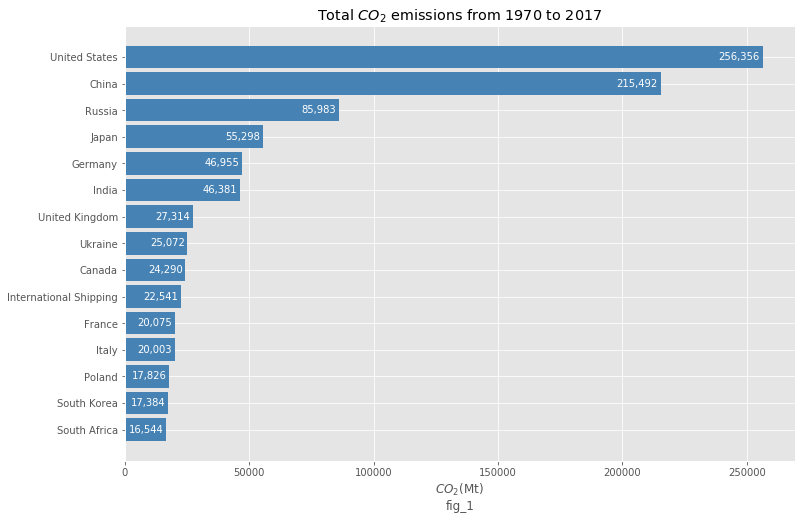

In [5]:
plt.figure(figsize=(12, 8))
top_15 = carbon_df.head(15)['total'].sort_values()
plt.barh(top_15.index,top_15, color='steelblue', height=0.85)
for i,v in enumerate(top_15):
    x = v-18000 if v>200000 else v-15000
    plt.text(x, i-0.1, f'{v:,.0f}', color='white')
plt.title('Total $CO_2$ emissions from 1970 to 2017')
plt.xlabel('$CO_2$(Mt)\nfig_1');

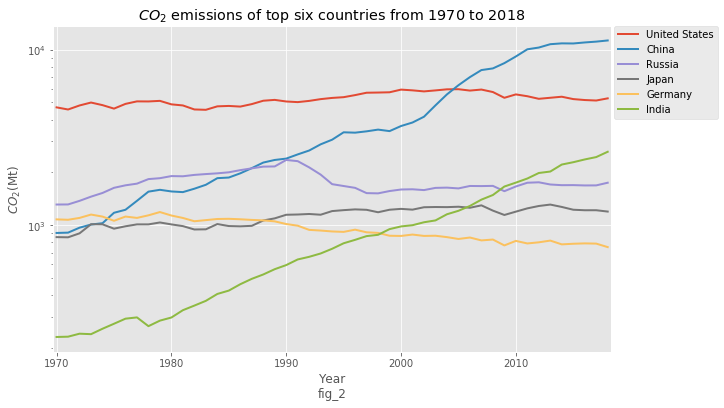

In [6]:
plt.figure(figsize=(10,6))
plt.semilogy(carbon_df.head(6).iloc[:,:-1].T, lw=2)
plt.legend(carbon_df.head(6).index, loc=1, bbox_to_anchor=(1.2, 1.015))
plt.xlim([1969.7,2018.3])
plt.xlabel('Year\nfig_2')
plt.ylabel('$CO_2$(Mt)')
plt.title('$CO_2$ emissions of top six countries from 1970 to 2018');

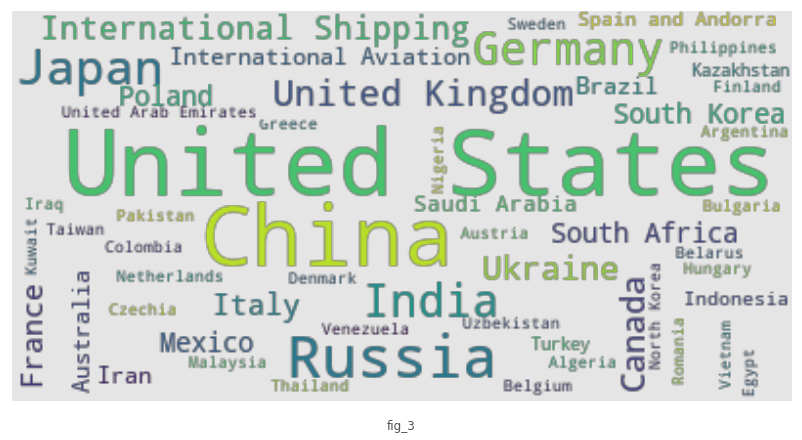

In [7]:
plt.figure(figsize=(14,14))
w_series = carbon_df.iloc[:, -1]
freq = w_series.to_dict()
wc = wordcloud.WordCloud(background_color=None,
                         random_state=1984,
                         max_words=2000,
                         mode='RGBA',
                         min_font_size=8).generate_from_frequencies(freq)
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.xlabel('\nfig_3');

In [8]:
names = {'Bahamas': 'The Bahamas', 'Congo': 'Republic of the Congo', 'Côte d’Ivoire': 'Ivory Coast',
         'France and Monaco': 'France', 'Guinea-Bissau': 'Guinea Bissau', 'Italy, San Marino and the Holy See': 'Italy',
         'North Macedonia': 'Macedonia', 'Spain and Andorra': 'Spain', 'Sudan and South Sudan': 'Sudan',
         'Tanzania': 'United Republic of Tanzania', 'The Gambia': 'Gambia', 'Timor-Leste': 'East Timor', 
         'United States': 'United States of America', 'Czechia': 'Czech Republic', 'Curaçao': 'Curacao',
         'Israel and Palestine, State of': 'Israel', 'Serbia and Montenegro': 'Republic of Serbia', 
         'Switzerland and Liechtenstein':'Switzerland'}

In [9]:
choro_df = carbon_df.loc[:,'total']
choro_df.index = choro_df.reset_index().loc[:,'index'].replace(names)
choro_df.index.name = None
choro_df.loc['Montenegro'] = choro_df.loc['Republic of Serbia']
choro_df = choro_df/1000
choro_df.head()

United States of America    256.355650
China                       215.491860
Russia                       85.982870
Japan                        55.297539
Germany                      46.955012
Name: total, dtype: float64

In [10]:
count, bins = np.histogram(choro_df,10)
js_file = 'https://raw.githubusercontent.com/minkyawzaw/data_science_project/master/world-countries(update).json'
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain')
folium.Choropleth(js_file,
                  choro_df,
                  key_on='feature.properties.name',
                  nan_fill_color='white',
                  fill_color='Paired',
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  bins=[0,5,10,15,20,30,50,65,90,210,260],
                  legend_name='Total amount of CO2(Mt) emission of the countries',
                  name='World choropleth',
                  highlight=True).add_to(world_map)
folium.LayerControl().add_to(world_map)
world_map

Based on the total $CO_2$ emissions amount from **1970 to 2018**(fig_1), the **United States and China** are the biggest $CO_2$ contributors to the environment.  They produced about three times the amount of **Russia** did. 

From the line plot(fig_2), we can see that **China and India** keep producing their $CO_2$ emissions as much as they can. We can't see that they have a plan to keep their $CO_2$ emissions based on the graph. The trend line of the **United States** is a pretty plateau, so we can assume that it tries to keep $CO_2$ emissions at a certain amount. **Germany** started reduced its $CO_2$ emissions from **1986**. We can conclude that **Germany** makes a great effort to reduce its $CO_2$ emissions based on the graph.

In Word cloud(fig_3), the font size and total $CO_2$ emissions amount have a direct relationship. The more $CO_2$ emissions are produced by a country, the larger the font it gets.

Before creating the choropleth map, the total $CO_2$ emissions amount of all countries are divided by 1,000. So, we can see the bins' value of the legend more clearly. From the graph, the total $CO_2$ emissions amount of most countries are less than **5,000(Mt)**. There are no countries between **90,000(Mt) and 210,000(Mt)**. So, we can realize that only two countries generate more than **210,000(Mt)** while the rest of the world produces less than **90,000(Mt)**.

### Analysis on $CO_2$ emissions per GDP

In [11]:
gdp_co2_df = pd.read_excel('../EDGARv5.0_FT2018_fossil_CO2_GHG_booklet2019.xls', 
                            sheet_name='fossil_CO2_per_GDP_by_country',
                            skipfooter=3,
                            index_col=0)
gdp_co2_df.index.name = None
gdp_co2_df.sort_values(2018, ascending=False, inplace=True)
gdp_co2_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Palau,11.585821,11.198449,9.974202,9.954021,14.536259,11.078711,10.187114,11.339425,10.035485,10.427104,8.989153,9.377212,5.510814,6.789822,5.742002,6.260265,6.259530,5.046598,5.396135,8.904368,8.612767,9.182780,13.495931,6.960754,4.626194,3.944524,3.970266,4.228305,4.132844
Turks and Caicos Islands,0.005146,0.005057,0.004799,0.004087,0.003677,0.003335,0.003719,0.004662,0.005410,0.004792,0.007208,0.007736,0.006499,0.667877,0.045961,0.016058,0.021512,0.132722,0.154150,0.211630,0.474318,0.417512,0.691528,0.701335,1.623319,1.322552,2.987625,3.590990,3.617063
Curaçao,1.259802,1.274163,1.264854,1.214818,1.258146,1.324699,1.347142,1.387414,1.391206,1.428051,1.376935,1.398075,1.322297,1.255358,1.302155,1.209377,1.204471,1.275610,1.398952,1.380654,1.482443,1.642616,1.748929,1.872063,1.765081,1.784392,2.026012,2.079769,2.039971
Syria,2.017559,2.502867,2.429311,2.602472,2.957996,2.811913,2.948482,2.420502,2.534013,2.187480,1.721423,1.484332,1.198140,0.995824,0.749051,0.593236,0.647400,0.624426,0.605187,0.577992,0.518584,0.469014,0.447087,0.377226,0.328629,0.316055,0.286079,0.292606,1.599229
New Caledonia,0.556291,0.580374,0.558538,0.535162,0.383360,0.369600,0.414478,0.380995,0.424736,0.447788,0.546611,0.542726,0.583611,0.571836,0.646973,0.593076,0.616284,0.636355,0.739877,0.699021,0.999388,1.202431,1.223622,1.049931,0.935697,0.854519,1.097002,1.102695,1.169314


In [12]:
fifth_df = gdp_co2_df.groupby(fifth_grouping, axis=1, sort=False).apply(np.mean, axis=1)
fifth_df.sort_values('[2016, 2018]', inplace=True, ascending=False)
fifth_df.head()

,"[1986, 1990]","[1991, 1995]","[1996, 2000]","[2001, 2005]","[2006, 2010]","[2011, 2015]","[2016, 2018]"
Palau,11.585821,11.348329,10.195656,6.736023,6.843880,7.642037,4.110472
Turks and Caicos Islands,0.005146,0.004191,0.005158,0.148826,0.198866,0.951249,3.398559
Curaçao,1.259802,1.267336,1.386149,1.297452,1.348426,1.762616,2.048584
New Caledonia,0.556291,0.485407,0.442922,0.587644,0.738185,1.053240,1.123004
Trinidad and Tobago,0.949772,0.872663,0.821980,0.883296,0.896779,0.856788,0.901560


In [13]:
carbon_df.loc[['Palau', 'Turks and Caicos Islands', 'Curacao', 'New Caledonia', 'Trinidad and Tobago'],'total']

Palau                        97.226054
Turks and Caicos Islands      1.835970
Curacao                     286.230421
New Caledonia               125.837639
Trinidad and Tobago         942.710149
Name: total, dtype: float64

In [14]:
gdp_country6 = (gdp_co2_df.loc[['United States', 'China', 'Russia', 'Japan', 'Germany', 'India']]
                .sort_values(2018, ascending=False))
gdp_country6

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
China,1.387679,1.341291,1.235793,1.176939,1.106128,1.098221,0.994272,0.926277,0.878595,0.800062,0.788157,0.761896,0.753066,0.794276,0.832645,0.842620,0.831215,0.798053,0.743733,0.728494,0.718339,0.720355,0.683342,0.662482,0.624204,0.583041,0.553609,0.524256,0.499289
Russia,0.761148,0.789145,0.851035,0.847607,0.855628,0.871167,0.883613,0.813356,0.856207,0.829466,0.769387,0.734239,0.693917,0.665604,0.623055,0.579588,0.553015,0.508959,0.485108,0.490801,0.499585,0.502971,0.487866,0.465656,0.458261,0.469485,0.465949,0.458785,0.464595
United States,0.551062,0.547127,0.537059,0.534861,0.522340,0.513659,0.508616,0.502336,0.481977,0.461664,0.459149,0.450198,0.436487,0.429912,0.420052,0.406414,0.388127,0.386088,0.374277,0.356160,0.362977,0.349048,0.329981,0.328482,0.325010,0.306304,0.297865,0.289562,0.289591
India,0.357433,0.380742,0.373613,0.372670,0.371628,0.371209,0.361004,0.364350,0.348937,0.345429,0.344537,0.334023,0.334422,0.317614,0.318992,0.309299,0.304989,0.307682,0.317068,0.328449,0.318628,0.319475,0.325694,0.312025,0.318336,0.303906,0.291306,0.280397,0.280960
Japan,0.304223,0.295189,0.294689,0.293397,0.304729,0.300199,0.294089,0.289378,0.283435,0.293702,0.288972,0.284926,0.293687,0.290094,0.283440,0.280251,0.272628,0.276800,0.261196,0.260846,0.261533,0.273286,0.277772,0.277432,0.267942,0.255231,0.251984,0.247255,0.241070
Germany,0.409644,0.381399,0.354223,0.354489,0.341929,0.334223,0.341294,0.323699,0.314934,0.297517,0.288199,0.288587,0.283493,0.286231,0.277795,0.269287,0.264621,0.246791,0.246906,0.242267,0.246935,0.230392,0.232688,0.236853,0.220607,0.218592,0.214825,0.209686,0.197479


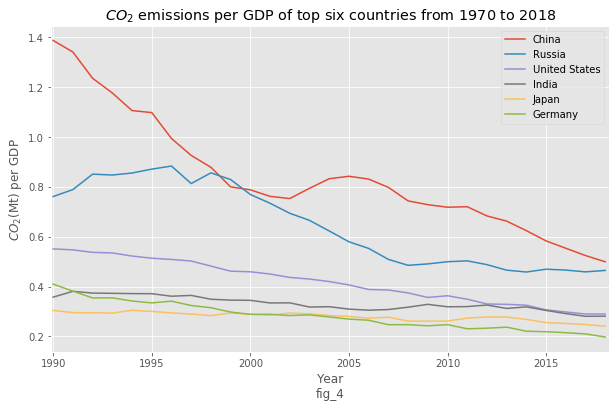

In [15]:
gdp_country6.T.plot(figsize=(10,6), xlim= [1989.9,2018.2])
plt.xlabel('Year\nfig_4')
plt.ylabel('$CO_2$(Mt) per GDP')
plt.title('$CO_2$ emissions per GDP of top six countries from 1970 to 2018');

Based on $CO_2$ emissions per GDP, the most pollutant countries are **Palau and Turks & Caicos Islands**. They are small island countries and their generated total $CO_2$ amount is also small that we can see from the table. Lower GDP makes them so pollutant. 

So, I think we should focus on the top six $CO_2$ generated countries. **China** is the most pollutant than other countries from the graph(fig_4). 

In **February 2014, Russia** is imposed sanctions by the **United States, the European Union (EU) and other countries** (You can find more information on google). That affects the GDP and makes **Russia** become a second pollutant country.

Based on $CO_2$ emissions and GDP, the **United States** is the most efficient country in making the best economy. 

### Analysis on $CO_2$ emissions per capita

In [16]:
co2_capita_df = pd.read_excel('../EDGARv5.0_FT2018_fossil_CO2_GHG_booklet2019.xls', 
                              sheet_name='fossil_CO2_per_capita_by_countr',
                              skipfooter=3,
                              index_col=0)
co2_capita_df.index.name = None
co2_capita_df.sort_values(2018, ascending=False, inplace=True)
co2_capita_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Palau,173.682660,171.089438,168.231177,165.521884,163.472673,162.394173,162.301689,163.098318,164.064554,164.456930,163.512926,163.391264,158.685878,160.319659,172.532231,136.309478,145.519637,149.818427,140.926148,144.502497,142.826261,138.225659,122.998841,122.430443,178.178587,136.132076,124.956403,138.903731,122.978574,128.136461,110.635729,121.781971,73.762812,87.199233,76.834507,87.114102,84.765766,68.739705,69.092298,106.806888,103.083923,115.013212,173.591562,87.175792,60.091833,56.143870,56.129887,57.015663,57.954644
Curaçao,32.898652,32.488892,37.249286,40.512111,33.154175,41.813256,36.907124,41.020603,42.746244,40.300608,40.071748,39.767280,36.023616,33.305159,35.181934,31.949526,33.800047,37.846555,36.778423,37.628842,37.320523,37.744204,37.472416,35.995153,37.278413,39.248216,39.906755,41.094861,41.210442,42.306391,40.808035,41.724306,40.060271,38.380186,39.849962,36.909209,36.655188,38.720752,42.079677,40.095964,42.020355,45.910309,48.060261,50.398676,46.497583,46.684870,52.032481,52.104663,52.142814
Qatar,134.392520,153.349172,168.851167,173.603023,135.549472,121.254255,107.356688,91.596921,97.974751,85.809631,65.175390,47.736150,45.629706,36.709479,47.937901,41.687289,40.839226,38.871517,37.796836,37.942504,35.691414,37.024234,38.336515,38.862858,40.468309,40.891054,43.665584,52.235125,53.607904,56.627478,53.590083,52.365724,56.040199,55.551249,54.160794,49.910044,47.947146,45.262206,42.079385,39.331625,39.108311,39.142098,39.104476,40.396534,40.656996,39.424750,38.782618,39.333384,38.186636
New Caledonia,11.637478,11.160935,11.221759,11.967511,13.990097,11.716863,10.962239,11.489974,11.330349,12.503876,12.780687,13.019325,8.188257,8.067596,8.161460,10.929805,10.049471,10.934412,10.348828,10.411839,9.558290,10.237533,9.678405,9.101972,6.529633,6.512977,7.168138,6.569906,6.934755,7.221265,8.818705,8.792167,9.535177,9.524264,11.164210,10.543089,11.357932,12.169930,14.339382,13.302121,19.715413,24.327955,25.214889,22.058818,20.067219,18.687224,24.347221,25.045951,26.220631
Trinidad and Tobago,6.708606,6.599658,6.625177,6.800444,6.524776,5.830190,6.646734,7.307184,7.605241,7.493502,7.979731,8.344294,9.282908,9.662970,9.942909,9.930903,9.816703,10.010267,10.638880,10.545860,10.357401,10.484309,10.725929,10.120395,10.880214,10.745753,11.705881,11.968962,13.255104,14.057473,14.623439,16.459510,17.949920,20.609281,22.075941,23.925119,27.518796,27.176513,28.546839,26.100362,29.151431,28.990365,25.013841,26.353888,27.354607,26.731200,26.333532,26.277400,26.191720


In [17]:
carbon_df.loc[['Palau', 'Curacao', 'Qatar', 'New Caledonia', 'Trinidad and Tobago'],'total']

Palau                    97.226054
Curacao                 286.230421
Qatar                  1835.373677
New Caledonia           125.837639
Trinidad and Tobago     942.710149
Name: total, dtype: float64

In [18]:
capita_country6 = (co2_capita_df.loc[['United States', 'China', 'Russia', 'Japan', 'Germany', 'India']]
                   .sort_values(2018, ascending=False))
capita_country6

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
United States,22.370185,21.561363,22.530985,23.201638,22.223847,21.042160,22.180859,22.708556,22.471700,22.430002,21.227838,20.729425,19.485360,19.215845,19.917540,19.836828,19.484236,19.939170,20.643092,20.676100,20.052491,19.697032,19.822880,20.085051,20.193690,20.167247,20.480194,20.868059,20.660983,20.484166,20.978679,20.565822,20.099412,20.186062,20.296622,20.149111,19.612621,19.692582,18.889476,17.364452,17.999696,17.441229,16.736507,16.848938,16.962355,16.332981,16.019222,15.806129,16.144476
Russia,10.099431,10.057897,10.486253,11.018352,11.495596,12.224749,12.557740,12.757307,13.455542,13.527889,13.813926,13.685555,13.838994,13.892474,13.928407,14.015930,14.314106,14.548931,14.779658,14.730464,15.961786,15.663585,14.409978,13.097854,11.561328,11.292915,11.040138,10.325927,10.320872,10.671813,10.927624,11.004027,10.934992,11.301994,11.383747,11.300801,11.690877,11.688194,11.725228,10.936779,11.628511,12.201367,12.259409,11.897338,11.776889,11.776509,11.720010,11.725916,12.144294
Japan,8.175241,8.039868,8.348610,9.270196,9.131612,8.522790,8.695155,8.825224,8.745280,8.891330,8.598525,8.343478,7.925847,7.887973,8.399103,8.134763,8.063877,8.078609,8.629492,8.838951,9.230739,9.231261,9.264067,9.148154,9.569598,9.661928,9.737207,9.665310,9.343503,9.641715,9.734996,9.623346,9.917072,9.932622,9.907450,9.949400,9.808797,10.117968,9.439803,8.915407,9.314690,9.725608,10.039215,10.236486,9.935003,9.593503,9.545978,9.567366,9.423621
Germany,13.770935,13.663372,13.979586,14.600835,14.221824,13.470819,14.250193,14.016084,14.519024,15.180677,14.533563,14.110876,13.547023,13.774549,13.995808,14.026718,13.920426,13.767137,13.633381,13.394144,12.867548,12.521697,11.781890,11.609254,11.414848,11.308221,11.615347,11.210124,11.122590,10.718573,10.689597,10.879062,10.677070,10.693904,10.496405,10.252409,10.464312,10.101693,10.242705,9.504899,10.092113,9.755906,9.885474,10.086941,9.573220,9.624975,9.646784,9.595751,9.145987
China,1.098309,1.075904,1.121276,1.142394,1.139141,1.281004,1.309570,1.449155,1.610467,1.626342,1.569232,1.533876,1.581420,1.640904,1.762190,1.747501,1.813459,1.903874,2.009356,2.041808,2.044870,2.129820,2.213678,2.374720,2.498797,2.728270,2.693459,2.721098,2.764935,2.693904,2.861686,2.979077,3.194331,3.685423,4.229268,4.740211,5.240724,5.715076,5.807172,6.187656,6.712172,7.332261,7.460072,7.751415,7.795396,7.745575,7.813847,7.865802,7.954426
India,0.419300,0.411521,0.418225,0.406030,0.425883,0.444222,0.463941,0.461049,0.401838,0.422192,0.429846,0.462138,0.479619,0.498665,0.533383,0.544983,0.579396,0.608211,0.630368,0.661466,0.683629,0.721056,0.731546,0.749446,0.781763,0.824042,0.845682,0.871603,0.870158,0.920777,0.936913,0.935763,0.956159,0.963377,1.027423,1.058243,1.110280,1.187795,1.243397,1.369705,1.422090,1.481041,1.572301,1.583096,1.714283,1.746931,1.790621,1.826403,1.936350


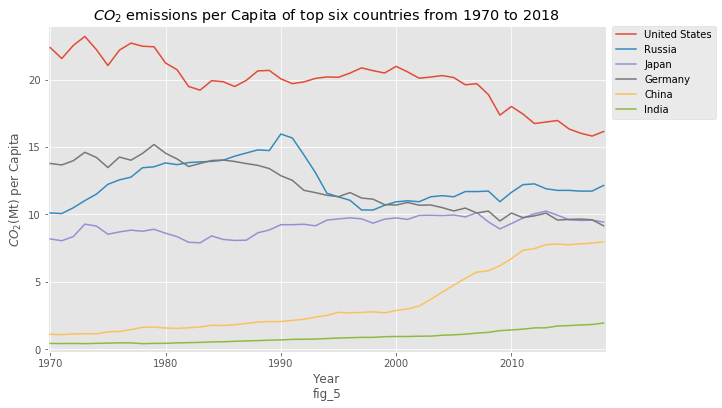

In [19]:
capita_country6.T.plot(figsize=(10,6))
plt.axis([1969.8, 2018.2, -0.2, 24])
plt.legend(bbox_to_anchor=(1.002, 1.015))
plt.xlabel('Year\nfig_5')
plt.ylabel('$CO_2$(Mt) per Capita')
plt.title('$CO_2$ emissions per Capita of top six countries from 1970 to 2018');

In this case, we are trying to explore $CO_2$ emissions per capita of each country. Again, I mainly emphasize on the top six countries for analyzing. Based on per capita, the **United States** is the most pollutant country that we can see from the graph(fig_5).

Interestingly, the most populous countries, **China and India**, are less pollutant than the other countries.

**India** is the lowest pollutant country and about **2(Mt)** per capita that is equal to the **one-eighth** of the **United States'**.

### Analysis on $CO_2$ emissions by sectors of the whole world

In [20]:
co2_sector_df = pd.read_excel('../EDGARv5.0_FT2018_fossil_CO2_GHG_booklet2019.xls', 
                              sheet_name='fossil_CO2_by_sector_and_countr')
co2_sector_df['total'] = co2_sector_df.sum(axis=1)
co2_sector_df.head()

,Sector,country_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
0,Power Industry,Afghanistan,0.056962,0.056962,0.116895,0.174969,0.206875,0.210758,0.241009,0.375716,0.273860,0.301744,0.310955,0.360061,0.346521,0.484085,0.436448,0.614186,0.646844,0.710167,0.652178,0.597486,0.590043,0.555179,0.326726,0.322448,0.155985,0.273944,0.325466,0.331140,0.407387,0.377433,0.370254,0.333735,0.336964,0.231521,0.274215,0.410177,0.440828,0.492150,1.085124,1.588591,2.017081,2.116617,2.100720,3.233659,3.414392,3.241768,3.241768,3.322330,3.419763,42.512087
1,Power Industry,Albania,0.600624,0.600624,0.616104,0.613008,0.606816,0.532512,0.535608,0.510840,0.798550,0.839960,0.819636,0.790405,0.900094,0.930087,0.975560,0.997232,1.009783,1.009783,1.011298,1.000895,0.523224,0.331272,0.185760,0.318888,0.390096,0.263160,0.216720,0.201240,0.213624,0.209863,0.283284,0.272390,0.283667,0.172677,0.167184,0.142416,0.142416,0.089784,NaN,0.006192,0.015480,0.030960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.159716
2,Power Industry,Algeria,1.645869,1.645869,1.550235,1.221972,1.465168,2.111895,2.530895,2.819267,3.299023,3.662236,5.123766,5.311708,6.917354,7.855238,8.112500,8.593605,10.246761,9.437591,10.398364,10.392024,10.222312,10.591620,11.027249,11.525378,12.343230,12.544211,12.608419,13.345442,14.949362,15.602361,15.832341,16.617463,17.547811,18.778734,19.836441,20.650187,22.000478,22.325079,24.115962,24.666333,25.086252,28.120880,30.929377,30.094453,32.629870,36.774115,36.177305,36.416426,39.915370,727.615801
3,Power Industry,Angola,0.137546,0.137546,0.159283,0.168752,0.371864,0.352957,0.346584,0.346584,0.346584,0.386987,0.399806,0.399806,0.421991,0.459552,0.117380,0.160956,0.204455,0.173340,0.260492,0.244935,0.291607,0.244935,0.172624,0.125175,0.175020,0.171847,0.197038,0.416667,0.385118,0.621123,0.728524,0.820550,0.820550,1.027545,0.653298,0.767417,0.868968,0.976807,1.385889,2.226396,2.369069,2.229655,1.843470,2.325888,3.441893,3.775559,3.974273,3.967023,4.066821,46.668150
4,Power Industry,Anguilla,0.000430,0.000430,0.000436,0.000438,0.000447,0.000480,0.000521,0.000449,0.000543,0.000662,0.000456,0.000452,0.000445,0.000417,0.000410,0.000403,0.000444,0.000464,0.000359,0.000374,0.000402,0.000420,0.000443,0.000444,0.000456,0.000461,0.000498,0.000460,0.000574,0.000491,0.000648,0.000731,0.000721,0.000751,0.000753,0.000745,0.000737,0.000760,0.000777,0.000778,0.000790,0.000910,0.000910,0.000978,0.000976,0.000980,0.000990,0.000985,0.001011,0.029639


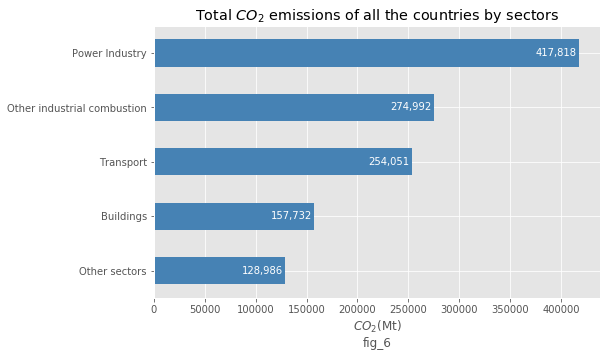

In [21]:
grouped = co2_sector_df.groupby('Sector')
sect_tot = grouped['total'].apply(sum).sort_values()
sect_tot.index.name = None
sect_tot.plot.barh(color='steelblue', figsize=(8,5))
for y,x in enumerate(sect_tot):
    plt.text(x-43000, y-0.05, f'{x:,.0f}', color='white')
plt.xlabel('$CO_2$(Mt)\nfig_6')
plt.title('Total $CO_2$ emissions of all the countries by sectors');

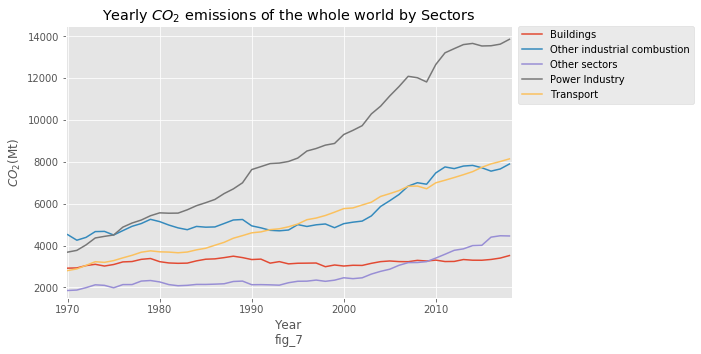

In [22]:
grouped[years].apply(sum).T.plot(figsize=(8,5))
plt.axis([1969.8, 2018.3, 1500, 14500])
plt.legend(bbox_to_anchor=((1.002, 1.02)))
plt.xlabel('Year\nfig_7')
plt.ylabel('$CO_2$(Mt)')
plt.title('Yearly $CO_2$ emissions of the whole world by Sectors');

In [23]:
co2_sector_df.loc['total'] = co2_sector_df.sum()
co2_sector_df.loc['total', ['Sector', 'country_name']] = ['', '']
co2_sector_df.tail()

,Sector,country_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
1032,Other sectors,Zambia,0.301075,0.458307,0.453559,0.404598,0.430783,0.406270,0.415486,0.473469,0.459984,0.459466,0.402438,0.413015,0.437397,0.474891,0.413451,0.439201,0.445710,0.479299,0.447195,0.477730,0.393305,0.344866,0.360072,0.376614,0.318535,0.319859,0.331762,0.402404,0.306098,0.273891,0.295872,0.216735,0.233606,0.286938,0.347635,0.337701,0.420533,0.413850,0.360117,0.463464,0.602237,0.569734,0.861757,0.948215,1.086162,1.139819,1.591587,1.744593,1.765269,2.580655e+01
1033,Other sectors,Zimbabwe,2.401474,2.349352,2.279305,2.587005,2.626823,1.903572,2.050701,2.156327,1.655842,1.976615,1.641550,1.252658,1.063745,0.749274,0.917660,0.926838,1.295993,1.214548,1.074653,0.892251,0.930420,0.969496,0.928483,0.782756,0.820697,1.022447,1.057906,1.182444,1.144948,1.245011,1.205142,1.098558,1.040537,0.853033,0.762954,1.114714,1.021537,0.786867,0.596007,0.577651,0.769478,0.908114,1.040916,0.929133,1.044989,0.998061,1.191983,1.306452,1.300813,6.164773e+01
1034,Transport,International Aviation,169.214838,169.214838,179.174549,187.170460,179.725005,173.872554,174.324798,190.080900,197.021602,203.783030,202.134417,201.929199,208.795943,210.812453,218.470092,224.898215,246.893201,260.799136,275.832752,290.034471,258.941242,251.610144,259.922716,264.939482,279.330847,290.340841,301.963397,318.048166,329.195766,342.645300,355.816866,348.012967,368.889017,367.940928,397.121948,422.776636,437.750410,450.796078,456.287464,435.074090,457.664564,473.295412,480.052546,490.178789,504.486996,529.686625,553.076212,559.247439,564.612452,1.571389e+04
1035,Transport,International Shipping,353.841995,353.841995,370.892262,391.998049,366.077402,341.215585,352.019333,351.718864,354.260322,365.434829,357.486345,332.475135,299.581521,280.235496,284.016550,306.887716,326.043691,322.502622,337.890370,337.684452,371.803525,386.631444,415.250484,402.472087,415.187241,428.724792,438.234622,448.720496,462.237768,486.162353,498.583921,474.007012,491.826791,502.203513,551.305799,572.169184,608.954522,645.212482,647.665784,616.167514,663.227284,667.687580,605.091271,611.213371,628.002813,657.324001,677.043721,683.814159,697.490442,2.254052e+04
total,,,15775.859779,15705.228761,16498.502460,17477.742775,17424.391227,17357.680611,18352.219748,18896.340722,19590.808976,20129.972539,19892.266516,19508.429004,19276.067417,19410.471919,20020.173495,20281.811289,20622.769953,21283.752349,22049.634317,22442.164072,22637.134398,22754.428388,22684.687829,22783.592040,23004.264605,23655.975361,24122.465459,24457.990442,24545.073588,24743.091998,25600.661436,25896.646478,26343.209534,27570.073034,28875.313269,29911.660655,30956.072958,32180.787739,32353.185554,31959.887854,33836.348014,34917.405253,35359.592849,35971.368203,36328.312700,36311.981565,36753.957827,37179.646279,37887.224131,1.233578e+06


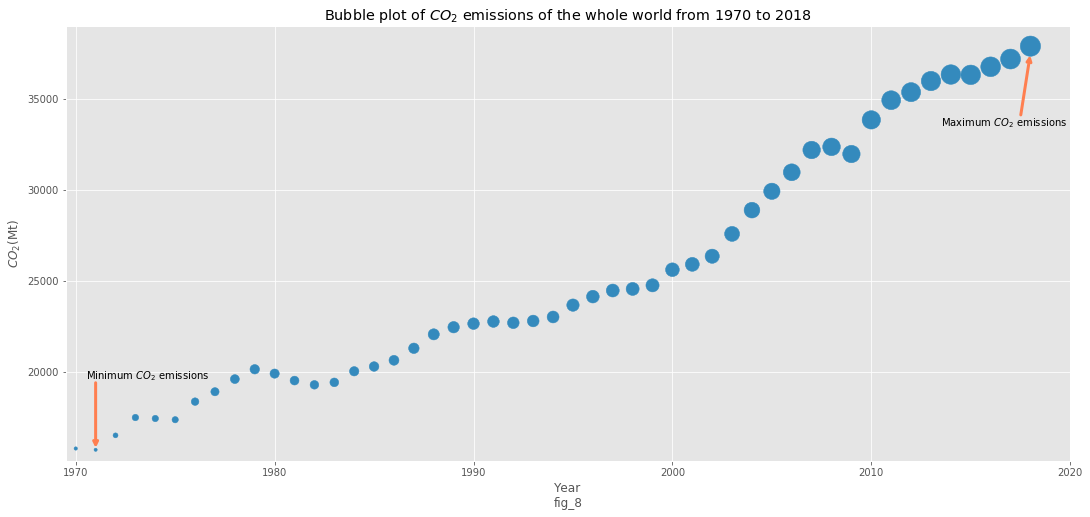

In [24]:
yearly_co2 = co2_sector_df.loc[['total'], years].T
yearly_co2.index.name = 'year'
minimum = yearly_co2.min()
maximum = yearly_co2.max()
norm_co2 = (yearly_co2-minimum) / (maximum-minimum)
yearly_co2.reset_index(inplace=True)
yearly_co2.plot.scatter('year', 'total',
                        s=norm_co2*400+10,
                        figsize=(18, 8))
annotates = [[(1971, 15700), (1971, 19500), (1970.5,19600), 'Minimum $CO_2$ emissions'],
             [(2018, 37500), (2017.5, 34000), (2013.5,33500), 'Maximum $CO_2$ emissions']]
for xy, xytext, xy2, text in annotates:
    plt.annotate('', xy=xy, xytext=xytext,
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='coral', lw=3))
    plt.annotate(text, xy=xy2)
plt.axis([1969.5, 2020, 15100, 39000])
plt.xlabel('Year\nfig_8')
plt.ylabel('$CO_2$(Mt)')
plt.title('Bubble plot of $CO_2$ emissions of the whole world from 1970 to 2018');

Let's analyze the $CO_2$ emissions of countries by sectors. Not surprisingly, the total $CO_2$ amount of **power Industry** from **1970 to 2018** is the highest compared to the other sector(fig_6). 

In the line chart(fig_7), yearly $CO_2$ emissions of the buildings sector are plateau while the other sectors have an upward trend.

Finally, look up the bubble plot(fig_8) of total $CO_2$ amount of the whole world we can see that the lowest and the highest amount are in **1971 and 2018**. This clearly states that we keep producing $CO_2$ into the environment to meltdown the climate.

I want to mention two things. One is I try to make absolute measure on the given scenario. The second is that you can think of that I'm a fun of the top six $CO_2$ production countries as most of the analysis is made on the countries.

Thanks for spending some time on the notebook.